We will use the Colab Python computational environment for the experiment in this subject. Refer to [this nice introduction](https://colab.research.google.com/notebooks/intro.ipynb#) for a comprehensive overview of the environment as well as further references to doing machine learning using Python in Colab.

This notebook is to get us familiarised with using Python to process data. We will dive into an example of building projectors for a dataset. We will explain nontrivial python features while running into them and have most of the Python codes either self-explanatory or with comments for beginners. If you are confused at a point about the Python language, and looking for a more "linear" introduction, check out (and bookmark) [this tutorial](https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb) as a reference to the language. 

HINT: Because now you are viewing a local copy of this notebook in your Google Drive, feel free to edit and play with the notes and codes. This is __your__ notebook. _Double Click Here_ to see how to take notes with this convenient tool, including embedding [links](https://www.markdowntutorial.com/) and insert math symbols like $x$, $y$ or a function $f: \mathbf X \rightarrow Y$.

# A taste of building a predictor from data

We start with our friend Iris dataset. Basically we are given a set of iris flower data samples, each has four attributes to describe the shape of the flower. The task is to determine the species of the flower according to the shape attributes.

## A small but practical dataset: Iris flowers

The dataset is a text-book example and widely used in machine learning. Instead of downloading from the Internet and perform pre-processing, we will use a prepared version of the dataset provided by the scientific learning `scikit-learn` library of Python. 

> The Python backend of Colab (called a "kernel") is a comprehensive version with many useful libraries installed, including `scikit-learn`. Be aware that the library is known within Python as `sklearn` (The operating system and Python "know" the same library with different names)



In [ ]:
# You can tell Python to use a library by import
# Try
print("Hello, world.")
print("The ratio of a circle's circumference to its diameter is", pi)
# And try to interpret why you got an error.

Hello, world.


NameError: ignored

In [ ]:
# Now use the math library, as it knows pi
import math
print("The ratio of a circle's circumference to its diameter is", math.pi)
# Note the "math." before pi, since the identifier pi is defined within 
# "math"'s namespace. You can try to uncomment the following statement
# and re-execute this code block to see the difference.

# print("The ratio of a circle's circumference to its diameter is", pi)
#


The ratio of a circle's circumference to its diameter is 3.141592653589793


In [ ]:
# Alternatively, we can import only a part of a library into the main namespace.
# This is often useful when the library is big and complex.
# 
# E.g. if you had tried the previous direct use of `pi` and got an error, try
# the following:
from math import pi
print(pi)
# This is what we will do in the next block to use the Iris data preparation 
# function of the scikit-learn library.

3.141592653589793


In [51]:
from sklearn.datasets import load_iris
iris = load_iris()
# The iris is a "dictionary" object, basically it is a complex object with 
# a "key-value" structure. The values in an dictionary d can be assessed by 
# d[KEY]
# where KEY is the value of the corresponding key. 
# -- how on earth do I know what `load_iris` will produce?
# -- by reading the doc
# But fortunately colab provides a handy way to read the doc, just 
# add a new code block in which, type
# load_iris?
# and execute (do not miss the question mark "?")

print(iris)
print()
print(iris.DESCR)

X = iris['data']   # key names are strings, which can be quoted using either
y = iris['target'] # double or single quotation marks -- so it makes things 
# easier when you want to mean the literal quotation mark symbol, see above
# in the statement when we print out *... circle's ...*.

# HINT: the above is equivalent to (and more often written as)
# X, y = iris['data'], iris['target']
# search for "tuple" and "unpacking" in Python for further ref.

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

## Using prebuilt model

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model
clf = LogisticRegression()

# Train the model on the training data
clf.fit(X_train, y_train)

# Test the model on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)


Accuracy: 1.0


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Working with data arrays

In addition to the `dir` command, we can also also investigate an object in Python by looking at its type. 

In [ ]:
print(type(X)) # numpy.ndarray

<class 'numpy.ndarray'>


We found that the type of the data is a `numpy.ndarray` -- an n-dimensional array managed by the library `numpy`. `numpy` has been internally imported by `scikit-learn`. We can also explicitly import it to use the functionalities by
`import numpy`, or with a shortcut:

In [ ]:
import numpy as np

Numpy is a wrapper of and provides high-level API to a set of highly efficient numerical computation low-level libraries. So the basic operations provided by `numpy` are very useful in dealing with data. Also the similar API interface is shared among all industry-level high-performance computation facilities, including R, PyTorch, TensorFlow, Matlab etc.  You can find a generic introduction to `numpy` in the Python tutorial privided at the beginning of this notebook.

In [ ]:
# Let us check the "shape" of our data array, which provides a piece of primary 
# information given to data
print(np.shape(X))
# The `.shape` is also implemented as a self-object attribute of a numpy array
# (not to be confused with data attribute!)
print(X.shape) # this is more often

(150, 4)
(150, 4)


Our data space $\mathcal X$ consists of all objects that are described with 4 numbers, -- we call it $\mathbb R^4$. A dataset from this data space will be a 2-D array (table) of $n$ (#.samples) rows and 4 columns. Arrays are ubiquitous objects used in data science. In Python, numerical arrays are usually managed by numerical computation libraries, in this case, `numpy`. You can check the data via array operations provided by `numpy`.



In [ ]:
# by futher finding out the shape of the targets, 
# we confirmed that there are 150 samples and 4 attributes per sample.
print(y.shape)

(150,)


As a running example, we will simplify the problem by 
1. using only the first two attributes of the data, and 
2. taking out the samples belonging to the first two classesand making the problem a binary classification one -- to classify  setosa and versicolor (y==0 or y==1) .


In [ ]:
# Indexing-1: Basic

# Elements in an array are assessed as follows:
print(y[0]) # the first element, Python (and numpy) arrays start with element-0
print(y[3]) # the 4-th element
print(X[2, 1]) # by 2: take the 3-rd row, then by 1: take the 2nd element
# check the results by 
# 1. print out the entire X and y, 
# 2. copy-and-paste the text to a separate file
# 3. compare the element values

0
0
3.2


In [ ]:
# Indexing-2: slicing

print(y[1:4]) # 3 elements, the element-1, 2, 3 (non-inclusive of 4)
print(y[0:3]) # 3 elements, the element-0, 1, 2 (non-inclusive of 3)
print(y[:3])  # the same 3 elements, you can omit 0 if starting from there
print(X[1, :2]) # the first 2 elements in row-1 (2nd row) of X
print(X[1, 2:4]) # the element 2, 3 in row-1 of X
print(X[1, 2:]) # the same two elements, you can omit the "end" (as 0 for start)
print(X[1, :]) # if you omit both, you mean the entire row
print(X[1]) # the same as above, the entire 2nd-row (row-1)
print(X.shape) # (150, 4)
print(X[1].shape) # one row of X: dimension - 1, (4, )
# Add intuitive understanding is to think one dimension as one degree of freedom 
# to move about in an array -- in 2D array you can go in the direction of either 
# rows or columns, while in one 1-D array you can only move in one direction -- 
# by specifying one dimension (to be a fixed value), the degrees of freedom 
# reduce by one.
print(X[5:10, 0]) # the first attribute (column) of sample (rows) 5, 6, 7, 8, 9
print(X[5:10, 0].shape) # one-D array, 1-D array has no meaningful col/row


[0 0 0]
[0 0 0]
[0 0 0]
[4.9 3. ]
[1.4 0.2]
[1.4 0.2]
[4.9 3.  1.4 0.2]
[4.9 3.  1.4 0.2]
(150, 4)
(4,)
[5.4 4.6 5.  4.4 4.9]
(5,)


In [ ]:
# Indexing-3: "advanced"

print(X[0, [0, 1, 2]]) # the 0, 1, 2 elements in row-0
print(X[0, [0, 2]]) # the 0, 2 elements in row-0 -- now you can cherry-picking
# there is a cost, refer to "advanced indexing" in numpy for more info.

[5.1 3.5 1.4]
[5.1 1.4]


In [ ]:
# Indexing-4: Binary
X_tmp = X[:6] # first 6 rows
print(X_tmp)
a0_tmp = X_tmp[:, 0] # first attribute of the 6 samples
print("a0", a0_tmp)
print("a0 shape", a0_tmp.shape)

binary_index = np.array([True, False, False, True, True, True]) 
print(a0_tmp[binary_index]) # bin-index has the same size as the array-dimension 
# to be indexed

print(X_tmp[binary_index]) # X_tmp has 6 rows, also indexable via the 
# binary array.

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]]
a0 [5.1 4.9 4.7 4.6 5.  5.4]
a0 shape (6,)
[5.1 4.6 5.  5.4]
[[5.1 3.5 1.4 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]]


With this, let us take the first two attributes from the data:

In [ ]:
X0 = X[:, 0]
# [Exercise] Insert your code here
# Let X1 to be the 2nd attribute of the flowers.

As we have discussed, one important condition for adopting learning-based modelling is that there must be some relationship between the observed and the targets to be discovered. To have a first impression, we use the visualisation library `matplotlib` to display a scatter plot of the samples (scattered w.r.t. the first two attributes) with colours showing their classes.

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X0, X1, c=y) # use y (target) value as colors, as to why specific 
# color is assigned to class 0/1/2, they are prescribed internally, the colors
# serve as tags to distinguish different classes, without real meaning.
# You can specify the color-correspondence, refer to `matplotlib` documents
# and search for "colormap" in interested. 

NameError: ignored

In the next, we do the 2nd simplification -- to keep only the first two classes of flowers.

In [53]:
print(y == 0) # numpy array takes "==" as element wise comparison
# and returns a binary array

two_class_index = np.logical_or(y == 0, y == 1) # logical or operation 
print(two_class_index)

simple_X = X[two_class_index]
simple_X = simple_X[:, 0:2]
simple_y = y[two_class_index]
print(simple_X.shape, simple_y.shape)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True 

## Building learning-based models from scratch

Now we are ready to go. Try to building a predictor $\mathcal X \mapsto \mathcal Y$. First, let us examine our assumption (again) that the link between the observable data attributes and the target does exist.

In [ ]:
plt.scatter(simple_X[:, 0], simple_X[:, 1], c=simple_y)

The mechanism to make output from an import in Python is implemented as a function.



In [58]:
# An example function
def predict_iris(X, y):
    # just by looking at the figure above, I come up with some rules, such as 
    # if x0 > 6.5, the flower is vericolor
    pred_y = []
    num = len(X)
    for i in range(num):
      if X[i][0] > 6.5:
          predicted_label = 1
      else:
          predicted_label = 0
      pred_y.append(predicted_label)
    return pred_y

In [61]:
# A direct check of the performance
y_pred = predict_iris(simple_X, simple_y)
accuracy = np.mean(y_pred == simple_y)
print("Accuracy:", accuracy)

Accuracy: 0.58


In [62]:
# [Exercise] Make your own predictor
def my_iris_predictor(X, y):
    # Insert your code here
    return predict_y

Visualisation of the iris dataset:

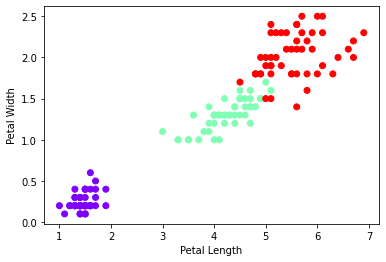

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px



# Create a scatter plot of petal length vs petal width, with different colors for each species
iris['Sepal.Length'] = X[:, 0]
iris['Sepal.Width'] = X[:, 1]
iris['Petal.Length'] = X[:, 2]
iris['Petal.Width'] = X[:, 3]


plt.scatter(iris['Petal.Length'], iris['Petal.Width'], c=iris['target'], cmap='rainbow')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

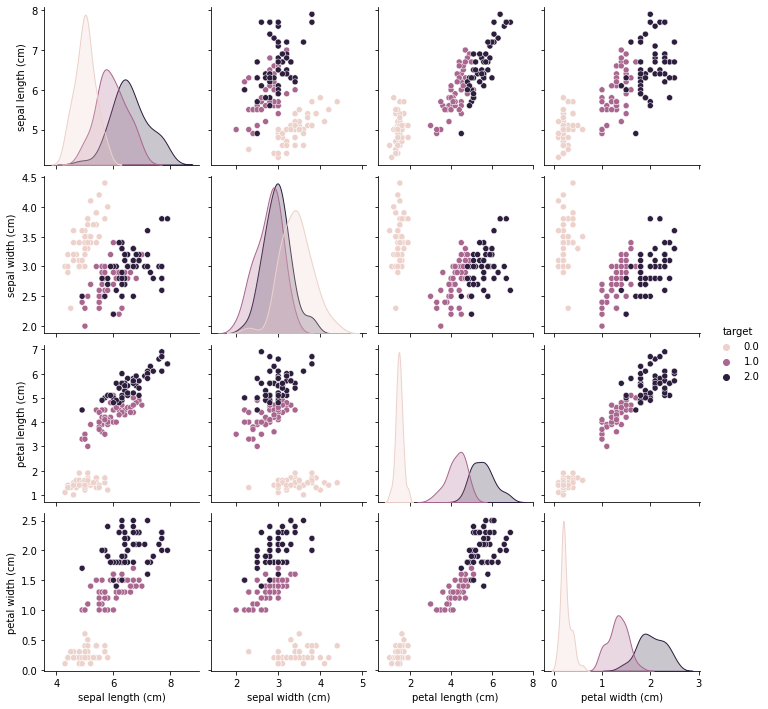

In [39]:
# Create a pairplot of all the features, with different colors for each species
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

sns.pairplot(df, hue='target')


In [47]:
# Create a 3D scatter plot of petal length, petal width and sepal length, with different colors for each species
fig = px.scatter_3d(x=iris['Petal.Length'], y=iris['Petal.Width'], z=iris['Sepal.Length'], color=iris['target'])
fig.show()